# LetsGrowMore - LGM - Data Science And Business Analytics - April 2022

### INTERMEDIATE LEVEL TASK - Exploratory Data Analysis on Dataset - Terroris

# Task 4 :- Exploratory Data Analysis ( Terrorism )

# Author : Vaibhav Ramteke

### Problem Statement: Perform 'Exploratory Data Analysis' on dataset 'Global Terrorism'

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
#setting the plot size using 'rcParams'
plt.rcParams['figure.figsize']=[15,8]

In [6]:
#set options
#display all columns of the dataframe
pd.options.display.max_columns=None

#display the rows of the dataframe
pd.options.display.max_rows=None #none for no limit

#use the below code to convert the exponential_values to float
np.set_printoptions(suppress=True)

In [12]:
# Reading data 
data_terr = pd.read_csv("C:\\Users\\Lenovo PC\\Downloads\\globalterrorism.csv")
data_terr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [13]:
data_terr.shape

(181691, 135)

In [14]:
data_terr.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [15]:
data_terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [16]:
data_terr.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [17]:
#first i'll rename the column to avoid some unnecessing confusion to understand
data_terr.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace=True)

In [18]:
data_terr.isnull().sum()

eventid                    0
Year                       0
Month                      0
Day                        0
approxdate            172452
extended                   0
resolution            179471
country                    0
Country                    0
region                     0
Region                     0
state                    421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
Summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
AttackType                 0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [19]:
#sort the variabels basis of of total null values in the variable
#'isnull().sum()' returns the number of missing values in each variable
#'ascending=False'  sorts values in the descending order
#the variable with highest number of missing values will appear first
Total=data_terr.isnull().sum().sort_values(ascending=False)

#calculate the percentage of missing values
Percent=(data_terr.isnull().sum()*100/data_terr.isnull().count()).sort_values(ascending=False)

#concat the 'Total' and 'Percent' columns using 'concat' function
#'keys' is the list of column names
#'axis=1' concats along the columns
missing_data=pd.concat([Total,Percent],axis=1,keys=['Total','Percentage of missing values'])
missing_data

,Total,Percentage of missing values
gsubname3,181671,99.988992
weapsubtype4_txt,181621,99.961473
weapsubtype4,181621,99.961473
weaptype4,181618,99.959822
weaptype4_txt,181618,99.959822
claimmode3,181558,99.926799
claimmode3_txt,181558,99.926799
gsubname2,181531,99.911938
claim3,181373,99.824978
guncertain3,181371,99.823877


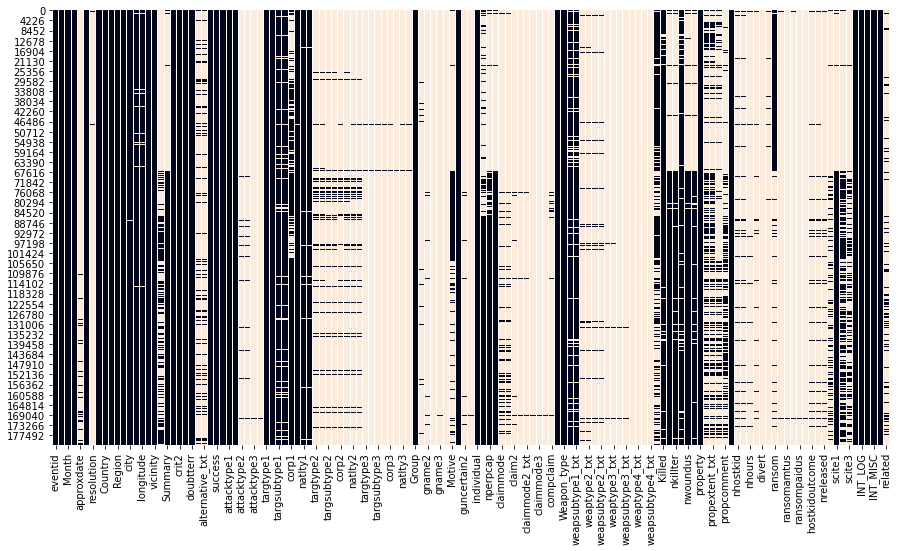

In [20]:
#plot heatmap to check null values
#'cbar=False' does not show the color axis
sns.heatmap(data_terr.isnull(), cbar=False)

#display the plot
plt.show()

As we can see in the graph we have alot of null values in the variable, whole columns should be dropped only if most entries in the column are empty.In our dataset most of the variable have 99 percent of missing values...

In [21]:
print("Country with the most attacks:",data_terr['Country'].value_counts().idxmax())
print("City with the most attacks:",data_terr['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data_terr['Region'].value_counts().idxmax())
print("Year with the most attacks:",data_terr['Year'].value_counts().idxmax())
print("Month with the most attacks:",data_terr['Month'].value_counts().idxmax())
print("Group with the most attacks:",data_terr['Group'].value_counts().index[1])
print("Most Attack Types:",data_terr['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [22]:
data_terr['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

### Number of Terrorist Activities each Year

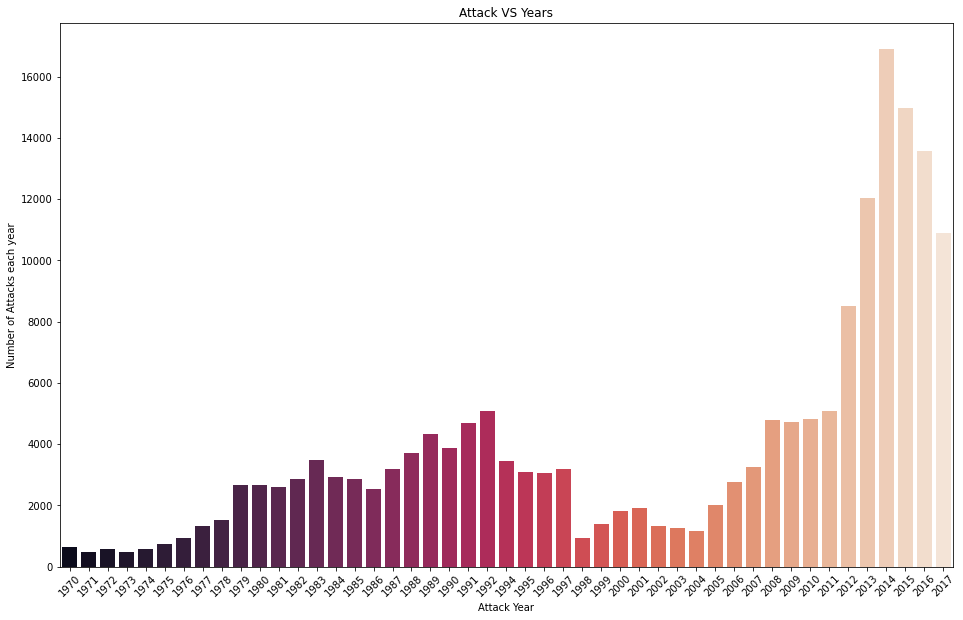

In [23]:
x_year = data_terr['Year'].unique()
y_count_years = data_terr['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (16,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack VS Years')
plt.show()

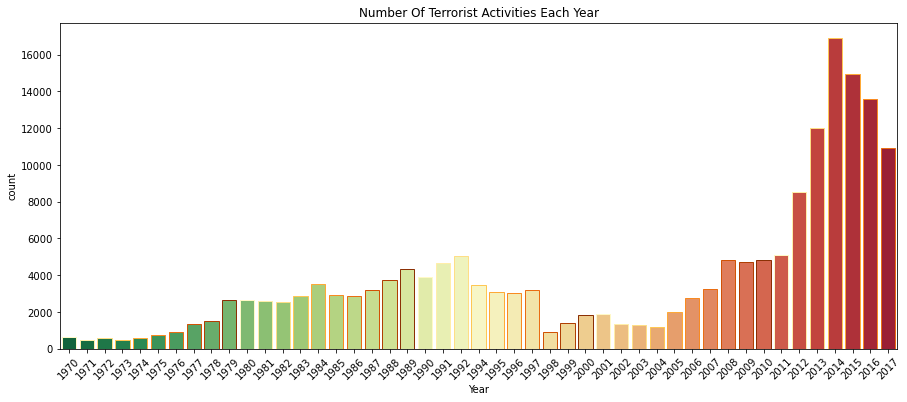

In [24]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data = data_terr,palette = 'RdYlGn_r',edgecolor = sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

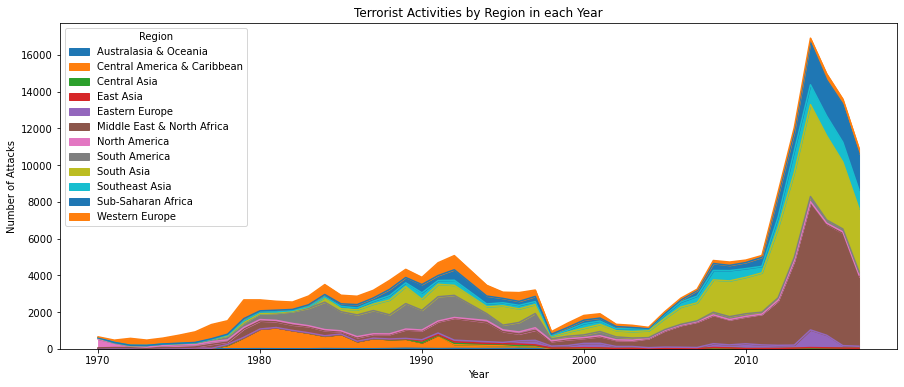

In [25]:
pd.crosstab(data_terr.Year, data_terr.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()


In [26]:
data_terr['Wounded'] = data_terr['Wounded'].fillna(0).astype(int)
data_terr['Killed'] = data_terr['Killed'].fillna(0).astype(int)
data_terr['casualities'] = data_terr['Killed'] + data_terr['Wounded']


#### Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

In [27]:
data_terr1 = data_terr.sort_values(by='casualities',ascending=False)[:40]

In [28]:
heat=data_terr1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [29]:
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
data_terr.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

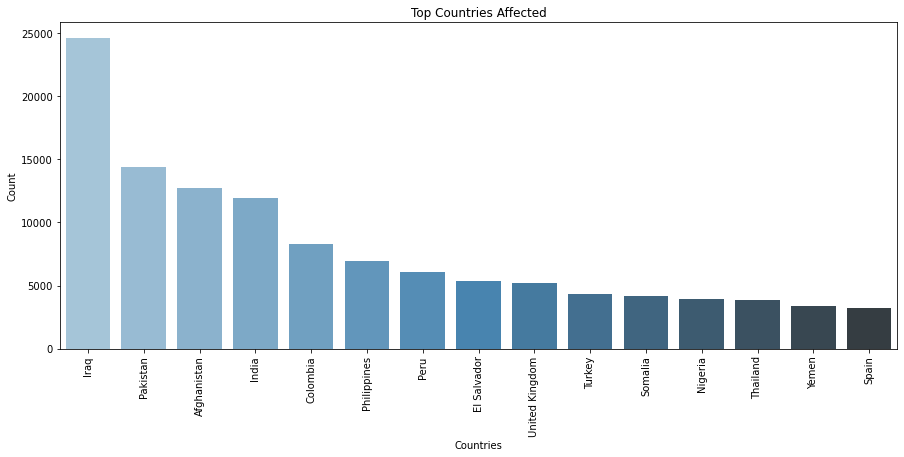

In [31]:
plt.subplots(figsize=(15,6))
sns.barplot(data_terr['Country'].value_counts()[:15].index,data_terr['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### ANALYSIS ON CUSTOMIZED DATA
#### Terrorist Attacks of a Particular year and their Locations
##### Let's look at the terrorist acts in the world over a certain year.

In [32]:
pip install folium

You should consider upgrading via the 'C:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [33]:
import folium
from folium.plugins import MarkerCluster 
filterYear = data_terr['Year'] == 1970

In [34]:
filterData = data_terr[filterYear] # filter data
reqFilterData = filterData.loc[:,'city':'longitude']
reqFilterData = reqFilterData.dropna()
reqFilterDataList = reqFilterData.values.tolist()

In [35]:

map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.
Now let us check out which terrorist organizations have carried out their operations in each country. A value count would give us the terrorist organizations that have carried out the most attacks. we have indexed from 1 as to negate the value of 'Unknown'

In [36]:
test = data_terr[data_terr.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [37]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

#### Frequency Of Attacks

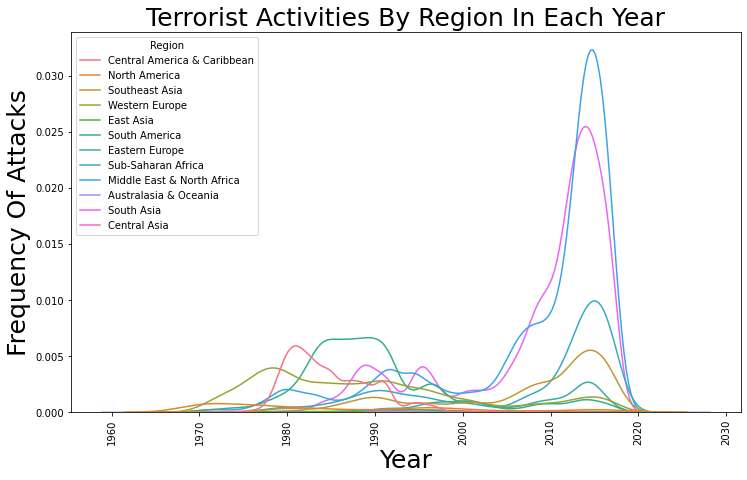

In [38]:
plt.subplots(figsize=(12,7))
sns.kdeplot(data_terr['Year'], hue=data_terr['Region'])
plt.title('Terrorist Activities By Region In Each Year', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Frequency Of Attacks', fontsize=25)
plt.xticks(rotation = 90)
plt.show()

#### Province With Highest Terror Attacks 

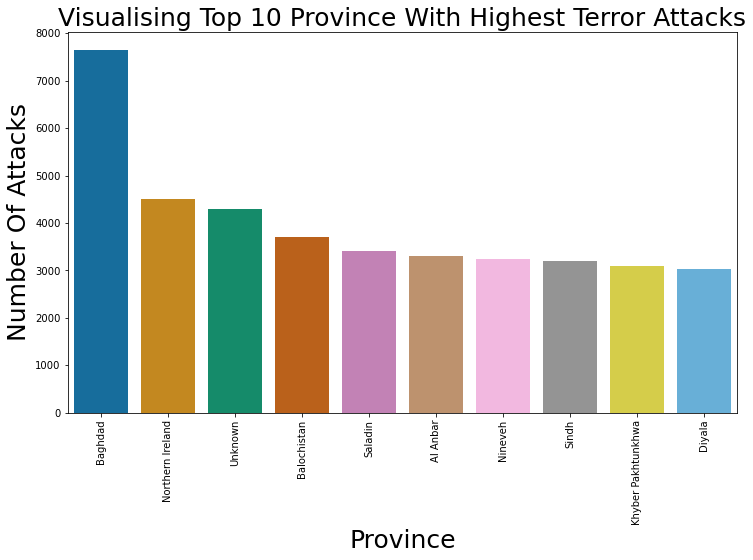

In [39]:
#Bar Plot 
plt.subplots(figsize=(12,7))
sns.barplot(data_terr['state'].value_counts()[:10].index, data_terr['state'].value_counts()[:10].values, palette='colorblind')
plt.title("Visualising Top 10 Province With Highest Terror Attacks", fontsize=25)
plt.xlabel('Province', fontsize=25)
plt.ylabel('Number Of Attacks', fontsize=25)
plt.xticks(rotation = 90)
plt.show()

####  Weapons Used In Terror Attacks

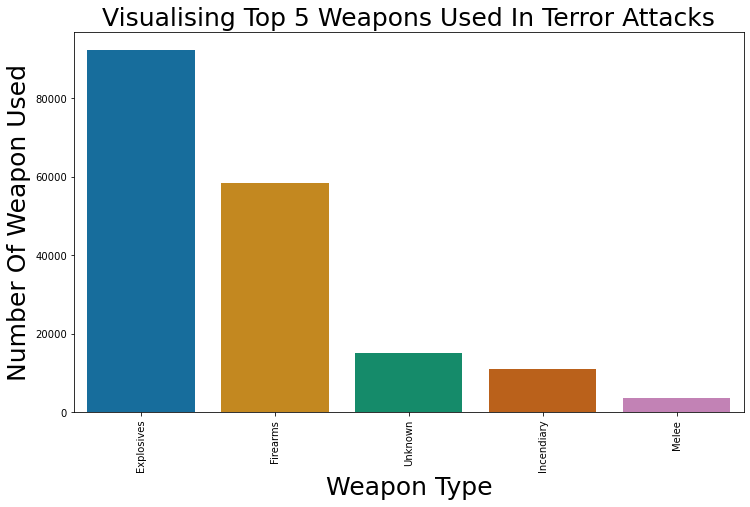

In [40]:
#Bar Plot
plt.subplots(figsize=(12,7))
sns.barplot(data_terr['Weapon_type'].value_counts()[:5].index, data_terr['Weapon_type'].value_counts()[:5].values, palette='colorblind')
plt.title("Visualising Top 5 Weapons Used In Terror Attacks", fontsize=25)
plt.xlabel('Weapon Type', fontsize=25)
plt.ylabel('Number Of Weapon Used', fontsize=25)
plt.xticks(rotation = 90)
plt.show()

In [41]:
data_terr['Weapon_type'].value_counts()[:10]

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: Weapon_type, dtype: int64

In [42]:
df=data_terr[['AttackType','Killed']]
df=df.groupby(['AttackType','Killed'],axis=0).sum().sort_values('Killed',ascending=False).drop('Unknown').reset_index().head(10)
df

,AttackType,Killed
0,Hostage Taking (Kidnapping),1570
1,Hijacking,1384
2,Hijacking,1383
3,Armed Assault,1180
4,Hostage Taking (Kidnapping),953
5,Armed Assault,670
6,Bombing/Explosion,588
7,Armed Assault,518
8,Hostage Taking (Kidnapping),517
9,Hostage Taking (Kidnapping),433


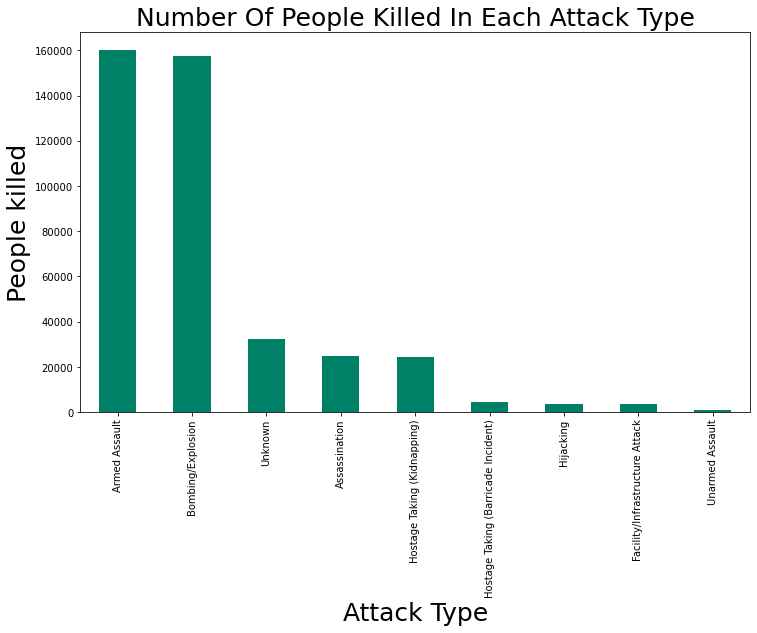

In [43]:
#Bar Plot
plt.subplots(figsize=(12,7))
data_terr.groupby(['AttackType'])['Killed'].sum().sort_values(ascending = False).head(20).plot(kind = 'bar', colormap = 'summer')
plt.title("Number Of People Killed In Each Attack Type", fontsize=25)
plt.xlabel('Attack Type', fontsize=25)
plt.ylabel('People killed', fontsize=25)
plt.xticks(rotation = 90)
plt.show()

#### Regions Having Wounded And Killed People

In [44]:
df=data_terr[['Region','Group','Killed']]
df=df.groupby(['Group','Region'],axis=0).sum().sort_values('Killed',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Region,Killed
0,Islamic State of Iraq and the Levant (ISIL),Middle East & North Africa,38654
1,Taliban,South Asia,29407
2,Boko Haram,Sub-Saharan Africa,20328
3,Shining Path (SL),South America,11601
4,Liberation Tigers of Tamil Eelam (LTTE),South Asia,10989
5,Al-Shabaab,Sub-Saharan Africa,9330
6,Farabundo Marti National Liberation Front (FMLN),Central America & Caribbean,8065
7,Nicaraguan Democratic Force (FDN),Central America & Caribbean,6662
8,Tehrik-i-Taliban Pakistan (TTP),South Asia,6042
9,Revolutionary Armed Forces of Colombia (FARC),South America,5659


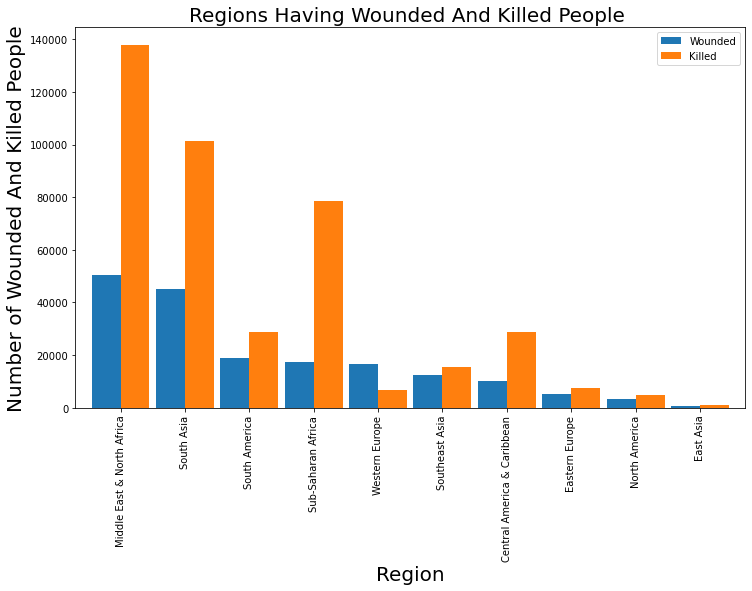

In [45]:
count_terror = data_terr['Region'].value_counts()[:10].to_frame()
count_terror.columns=['Wounded']
count_kill=data_terr.groupby ('Region')['Killed'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Regions Having Wounded And Killed People ", fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Number of Wounded And Killed People', fontsize=20)
fig.set_size_inches(12,7)
plt.show()

In [46]:
df=data_terr[['Country','Group','Killed']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('Killed',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,Killed
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058
1,Taliban,Afghanistan,29269
2,Boko Haram,Nigeria,16917
3,Shining Path (SL),Peru,11595
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928
5,Al-Shabaab,Somalia,8176
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014


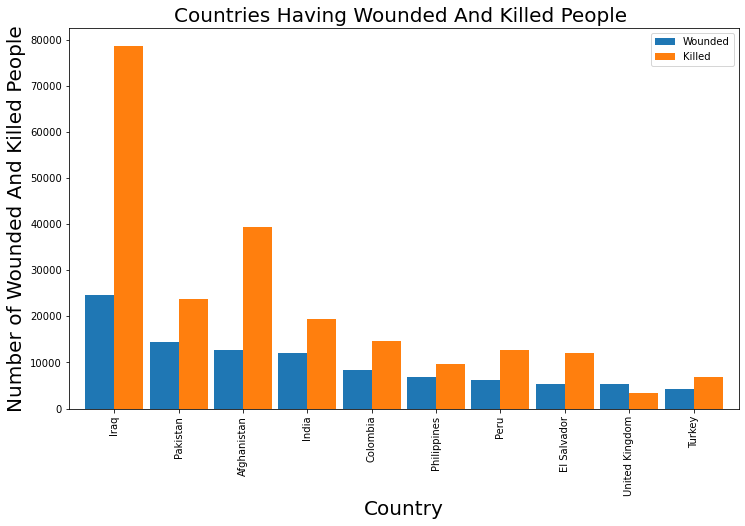

In [47]:
count_terror = data_terr['Country'].value_counts()[:10].to_frame()
count_terror.columns=['Wounded']
count_kill=data_terr.groupby ('Country')['Killed'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Countries Having Wounded And Killed People ", fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Number of Wounded And Killed People', fontsize=20)
fig.set_size_inches(12,7)
plt.show()

### Conclusion
1) In 2014 we saw the most number of terrorist attacks (Total=16903), closely followed by 2015 (Total=14965) and 2016 (13587).<br>
2) Iraq is the most attacked country in the world.<br>
3) Baghdad is the unsafest city in the world, witnessing 7589 attacks.21151 people have been killed in Baghdad, and 78589 people in Iraq.<br>
4) Explosives and firearms are mostly used weapons in attacks.<br>
5) Till 2017, 24113 Iraqi nationals have been killed in terrorist attacks.<br>
6) Taliban was involved in most of the terrorist attacks.

## Thank You!!!